In [103]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [6]:
df =pd.read_excel("D:\\Réseaux de neurones\\projet\\energy+efficiency\\ENB2012_data.xlsx")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [18]:
X=df.iloc[:,0:8]
Y1=df.iloc[:,8]
Y2=df.iloc[:,9]

X.shape

(768, 8)

In [19]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.shape

(768, 8)

In [70]:
def splitData(X, Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test 

In [71]:
X_train, X_test, y1_train, y1_test =splitData(X, Y1)
print(y1_train[0])

X_train, X_test, y2_train, y2_test =splitData(X, Y2)
print(y2_train[0])

15.55
21.33


In [72]:
def bp_model(X_train, y_train,X_test,hidden_layer=(50, 30,20), acti='relu' ,sol='adam',max_it=5000,random_st=42):
    bp = MLPRegressor(hidden_layer_sizes=hidden_layer,  # architecture du réseau
                        activation=acti,
                        solver=sol,
                        max_iter=max_it,
                        random_state=random_st)
    bp.fit(X_train, y_train)
    y_pred = bp.predict(X_test)

    
    return y_pred

In [98]:
y1_pred = bp_model(X_train, y1_train,X_test,hidden_layer=(50, 30,20), acti='relu' ,sol='adam',max_it=5000,random_st=42)
y2_pred= bp_model(X_train, y2_train,X_test,hidden_layer=(50, 40,30,20), acti='relu' ,sol='adam',max_it=10000,random_st=42)
print("y1_pred :",y1_pred)
print("y2_pred :",y2_pred)

y1_pred : [16.38914536 13.00572637 32.76793843 41.50125159 16.76769978 23.01616517
 24.35800938 28.67591514 18.67103678 27.98597631 19.02169739 32.53768831
 28.42905343 10.3288067  18.6960901  36.34853918 35.72257056 11.76581
 14.53875539 32.37895383 28.66347554 41.47893342 11.2353673  35.83341773
 15.25797519 36.23357834 35.78173862 28.52803582 16.99087751 14.42412448
 10.53146485 12.16951556 16.92477771 26.35780231 35.47990821 28.65262129
 32.18098175 35.88109874 35.34992251 10.94358745 28.14816403 12.00560559
  6.7476882  31.33871165  6.92620993  6.9327163   6.64395499 10.59286931
 28.44367607 31.85032877 35.61983167 12.83171235 12.56186496 38.87495517
 12.44735079 15.0648968  12.03866247 26.28839655 39.29616645 36.22701391
 13.9733856  16.4031055  12.85314962 23.83772879 28.40828199 36.11978481
 36.35562574 11.03641394 12.91277762 11.87784389 28.30097219 32.44147763
 12.43309853 23.61857732 31.42751467 12.22274103 28.52555519 25.97291217
 33.00634297 19.37902853 24.25745315 38.7680

In [99]:
#y1_pred = bp.predict(X_test)
#y2_pred = bp2.predict(X_test)
mse1 = mean_squared_error(y1_test, y1_pred)
# coefficient de détermination 
r21 = r2_score(y1_test, y1_pred)


mse2 = mean_squared_error(y2_test, y2_pred)
# coefficient de détermination 
r22 = r2_score(y2_test, y2_pred)

print("MSE1:", mse1)
print("R²1:", r2)
print("--------")
print("MSE2:", mse2)
print("R²2:", r22)

MSE1: 0.3668644884766363
R²1: 0.9964803222816747
--------
MSE2: 4.453353776690123
R²2: 0.9519373345487916


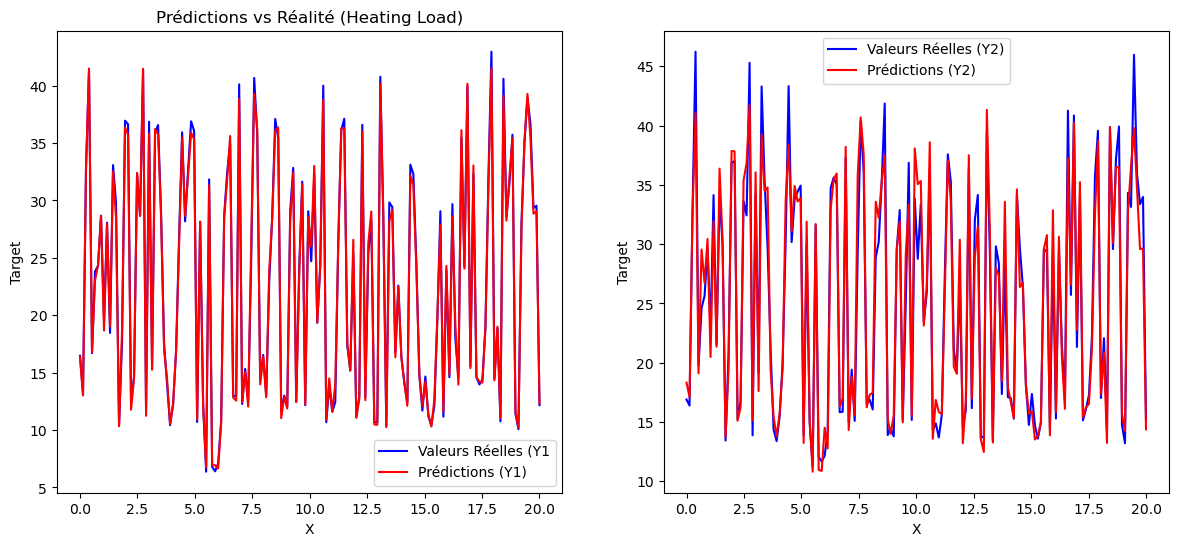

In [114]:
valeurs = np.linspace(0, 20, 154)
plt.figure(figsize=(30, 6))
plt.subplot(141)
#plt.scatter(y1_test, y1_pred)
plt.xlabel("X")
plt.ylabel("Target")
plt.title("Prédictions vs Réalité (Heating Load)")
plt.plot(valeurs, y1_test, color='blue',label="Valeurs Réelles (Y1")
plt.plot(valeurs, y1_pred ,color='red',label="Prédictions (Y1)")
plt.legend()
plt.subplot(142)
#plt.scatter(y2_test, y2_pred)
plt.xlabel("X")
plt.ylabel("Target")
#plt.title("Prédictions vs Réalité ( Cooling Load )")
plt.plot(valeurs, y2_test, color='blue',label="Valeurs Réelles (Y2)")
plt.plot(valeurs, y2_pred, color='red',label="Prédictions (Y2)")
plt.legend()
plt.show()

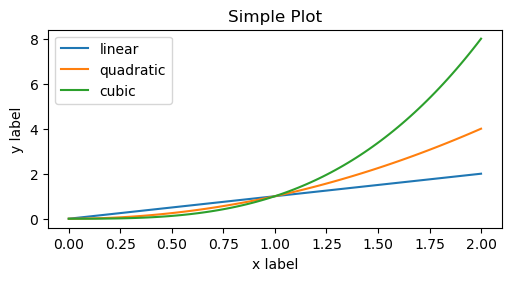